In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from io import BytesIO
import tarfile
import requests

In [5]:
os.getcwd()

'/Users/shubhamtripathi/Desktop/Shubham/ai/repos/self/Applied-ML/mlcourse.ai.solutions/topic04_linear_models'

In [8]:
# data source
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

def loadImdbDataSet(extrctPth='../../data', ovrWrt=False):
    # check if already exists
    if os.path.isfile(os.path.join(extrctPth,'aclImdb','README')) and not ovrWrt:
        print('Dataset already downloaded!')
        return
    print('Downloading Imdb dataset!')
    rsp = requests.get(url)
    tar = tarfile.open(mode='r:gz', fileobj=BytesIO(rsp.content))
    data = tar.extractall(extrctPth)

loadImdbDataSet()


Dataset already downloaded!


In [9]:
# load train and test sets
PATH_IMDB_DATASET = '../../data/aclImdb/'
rvwTrn = load_files(os.path.join(PATH_IMDB_DATASET, 'train'), categories=['pos', 'neg'])
rvwTst = load_files(os.path.join(PATH_IMDB_DATASET, 'test'), categories=['pos', 'neg'])

In [13]:
txtTrn, yTrn = rvwTrn['data'], rvwTrn['target']
txtTst, yTst = rvwTst['data'], rvwTst['target']

In [26]:
print('Length of training set: %d' % (len(txtTrn)))
print('Length of testing set: %d'% len(txtTst))

Length of training set: 25000
Length of testing set: 25000


In [28]:
cntVctrzr = CountVectorizer()
cntVctrzr.fit(txtTrn)
len(cntVctrzr.vocabulary_)

74849

In [31]:
print(cntVctrzr.get_feature_names()[:100])

['00', '000', '0000000000001', '00001', '00015', '000s', '001', '003830', '006', '007', '0079', '0080', '0083', '0093638', '00am', '00pm', '00s', '01', '01pm', '02', '020410', '029', '03', '04', '041', '05', '050', '06', '06th', '07', '08', '087', '089', '08th', '09', '0f', '0ne', '0r', '0s', '10', '100', '1000', '1000000', '10000000000000', '1000lb', '1000s', '1001', '100b', '100k', '100m', '100min', '100mph', '100s', '100th', '100x', '100yards', '101', '101st', '102', '102nd', '103', '104', '1040', '1040a', '1040s', '105', '1050', '105lbs', '106', '106min', '107', '108', '109', '10am', '10lines', '10mil', '10min', '10minutes', '10p', '10pm', '10s', '10star', '10th', '10x', '10yr', '11', '110', '1100', '11001001', '1100ad', '111', '112', '1138', '114', '1146', '115', '116', '117', '11f', '11m']


In [32]:
xTrn = cntVctrzr.transform(txtTrn)

In [35]:
xTrn

<25000x74849 sparse matrix of type '<class 'numpy.int64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [36]:
print(txtTrn[19726])

b'This movie is terrible but it has some good effects.'


In [38]:
xTrn[19726].nonzero()[1]

array([ 9881, 21020, 28068, 29999, 34585, 34683, 44147, 61617, 66150,
       66562], dtype=int32)

In [42]:
xTst = cntVctrzr.transform(txtTst)

In [46]:
logit = LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=17)
logit.fit(xTrn, yTrn)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=17, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
round(logit.score(xTrn, yTrn), 3), round(logit.score(xTst, yTst), 3)

(0.981, 0.864)

In [50]:
%%time
from sklearn.pipeline import make_pipeline
textPipeLogit = make_pipeline(CountVectorizer(), 
                              LogisticRegression(solver='lbfgs',
                                                 n_jobs=-1,
                                                 random_state=17)
                             )
textPipeLogit.fit(txtTrn, yTrn)
print(textPipeLogit.score(txtTst, yTst))

0.86408
CPU times: user 9.03 s, sys: 360 ms, total: 9.39 s
Wall time: 12.5 s


**Comparing with RandomForest**

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
forest = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=7)

In [58]:
%%time
forest.fit(xTrn, yTrn)

CPU times: user 2min 59s, sys: 638 ms, total: 3min
Wall time: 23.4 s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [59]:
round(forest.score(xTst,yTst))

1.0

## XOR Problem

In [61]:
# create dataset
rng = np.random.RandomState(0)
X = rng.randn(200, 2) # shape of matrix is 200 rows and 2 cols
y = np.logical_xor(X[:,0] > 0, X[:,1] > 0)


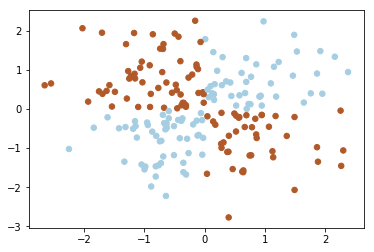

In [72]:
plt.scatter(X[:,0], X[:,1], s=30, c=y, cmap=plt.cm.Paired)

/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


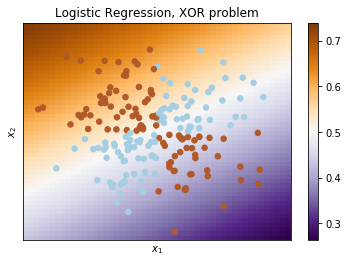

In [73]:
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);
plot_boundary(LogisticRegression(solver='lbfgs'), X, y,
              "Logistic Regression, XOR problem")


In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/shubhamtripathi/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linetypes'
  s)


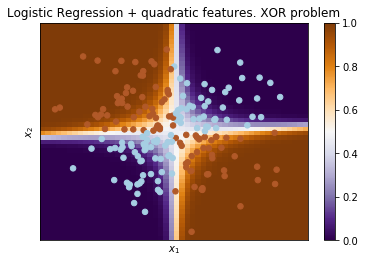

In [75]:
logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression(solver='lbfgs' ))])
plot_boundary(logit_pipe, X, y,
              "Logistic Regression + quadratic features. XOR problem")
